In [ ]:
import os, cv2, itertools
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile

In [ ]:
TRAIN_DIR = r'C:\Users' #File Path
ROWS = 64
COLS = 64
CHANNELS = 3

In [ ]:
os.listdir(TRAIN_DIR)[0:5]

In [ ]:
train_images = [TRAIN_DIR+'\\'+i for i in os.listdir(TRAIN_DIR)]
train_images[0:2]

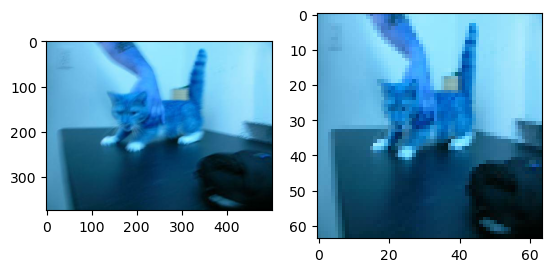

i =  0
C:\Users\death\Downloads\train\train\cat.0.jpg
Shape of resized image is (64, 64, 3)


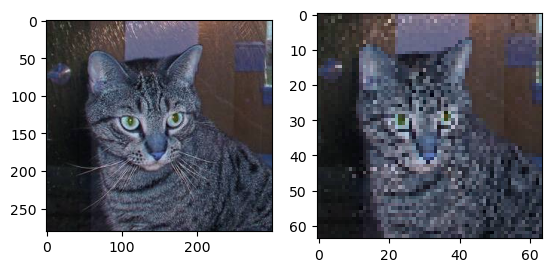

i =  1
C:\Users\death\Downloads\train\train\cat.1.jpg
Shape of resized image is (64, 64, 3)


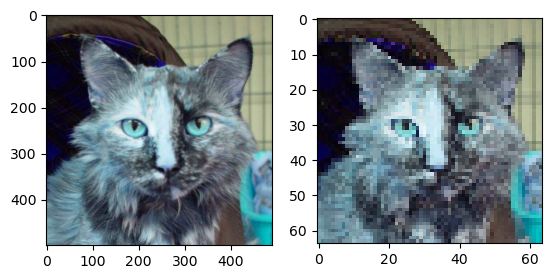

i =  2
C:\Users\death\Downloads\train\train\cat.10.jpg
Shape of resized image is (64, 64, 3)


In [ ]:
for i,image_file in enumerate(train_images) :
    img = cv2.imread(image_file, cv2.IMREAD_COLOR)
    img_resized = cv2.resize(img, (ROWS, COLS),interpolation=cv2.INTER_CUBIC)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img)
    ax2.imshow(img_resized)
    plt.show()
    print('i = ', i)
    print(image_file)
    print('Shape of resized image is {}'. format(img_resized.shape))
    time.sleep(2)
    if i==2:
        break

In [ ]:
img_resized.shape

(64, 64, 3)

In [ ]:
print(image_file)
if 'cat' in image_file.lower() :
    print('cat, output = 1')
else:
    print('dog, output = 0')

C:\Users\death\Downloads\train\train\cat.10.jpg
cat, output = 1


In [ ]:
'dog' in image_file.lower()

False

In [ ]:
def read_and_reshape_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if img.shape[:2] != (64, 64):
        img = cv2.resize(img, (64, 64), interpolation=cv2.INTER_CUBIC)

    return img.reshape((64*64*3,))

In [ ]:
def prep_data(train_images):
    m = len(train_images)
    n_x = 64 * 64 * 3

    X = np.ndarray((m, n_x), dtype=np.uint8)

    for i, image_file in enumerate(train_images):
        img = read_and_reshape_image(image_file)
        X[i, :] = img.flatten()

    return X

In [ ]:
X = prep_data(train_images)

In [ ]:
Y = np.array([int('cat' in image_file.lower()) for image_file in train_images])
Y = Y.reshape(-1, 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20000, 12288)
(5000, 12288)
(20000, 1)
(5000, 1)


In [ ]:
np.savez_compressed('cats_cnn', X_train, X_test, Y_train, Y_test )